<a href="https://colab.research.google.com/github/Isyaanggita/World-Happiness-Score/blob/main/World_Happiness_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Case 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

from sklearn.neighbors import NearestNeighbors
from google.colab import  drive

In [ ]:
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Datasets/Bibit Study Case"

Mounted at /content/drive
 2015.csv   2018.csv		     'Bibit - Technical Data Analysis.xlsx'
 2016.csv   2019.csv
 2017.csv  'Bibit Analysis.gslides'


In [ ]:
# Load Data Needed

user_detail = pd.read_excel('/content/drive/MyDrive/Datasets/Bibit Study Case/Bibit - Technical Data Analysis.xlsx', sheet_name="user_detail")
acquisition_channel = pd.read_excel('/content/drive/MyDrive/Datasets/Bibit Study Case/Bibit - Technical Data Analysis.xlsx', sheet_name="acquisition_channel")
referral = pd.read_excel('/content/drive/MyDrive/Datasets/Bibit Study Case/Bibit - Technical Data Analysis.xlsx', sheet_name="referral")
first_transaction_amount = pd.read_excel('/content/drive/MyDrive/Datasets/Bibit Study Case/Bibit - Technical Data Analysis.xlsx', sheet_name="first_transaction_amount")
marketing_spending = pd.read_excel('/content/drive/MyDrive/Datasets/Bibit Study Case/Bibit - Technical Data Analysis.xlsx', sheet_name="marketing_spending")

In [ ]:
# Join Acquisition Channel Column

df = user_detail.merge(acquisition_channel, how='left', on='User ID')
df = df[['User ID', 'First Name_x', 'Last Name_x', 'Full Name_x', 'Install ',
       'Uninstall Time', 'App Launch', 'Start Registration ',
       'Registration Completed', 'First Time Transaction', 'City Activity',
       'Country Activity', 'OS', 'Age', 'Acquisition Channel']]

# Join Referral Column

df = df.merge(referral, how='left', on='User ID')
df = df[['User ID', 'First Name_x', 'Last Name_x', 'Full Name_x', 'Install ',
       'Uninstall Time', 'App Launch', 'Start Registration ',
       'Registration Completed', 'First Time Transaction', 'City Activity',
       'Country Activity', 'OS', 'Age', 'Acquisition Channel','Referral Code', 'Referrer Code']]

# Join First Transaction Amount Column

df = df.merge(first_transaction_amount, how='left', on='User ID')
df = df[['User ID', 'First Name_x', 'Last Name_x', 'Full Name_x', 'Install ',
       'Uninstall Time', 'App Launch', 'Start Registration ',
       'Registration Completed', 'First Time Transaction', 'City Activity',
       'Country Activity', 'OS', 'Age', 'Acquisition Channel', 'Referral Code',
       'Referrer Code','First Time Transaction Amount']]

df = df.loc[((df['City Activity'] == 'Jakarta') | (df['City Activity'] == 'Surabaya') | (df['City Activity'] == 'Tangerang') \
                              | (df['City Activity'] == 'Pekanbaru') | (df['City Activity'] == 'Malang') | (df['City Activity'] == 'Denpasar') \
                              | (df['City Activity'] == 'Bekasi') | (df['City Activity'] == 'Bandung') | (df['City Activity'] == 'Semarang') \
                              | (df['City Activity'] == 'Manado') | (df['City Activity'] == 'Padang') | (df['City Activity'] == 'Ambon')) & (df['Uninstall Time'].notnull())]
df.head()

,User ID,First Name_x,Last Name_x,Full Name_x,Install,Uninstall Time,App Launch,Start Registration,Registration Completed,First Time Transaction,City Activity,Country Activity,OS,Age,Acquisition Channel,Referral Code,Referrer Code,First Time Transaction Amount
0,51206,Abby,Nixon,Abby Nixon,2021-01-06,2021-01-10,2021-01-06,NaT,NaT,NaT,Surabaya,Indonesia,IOS,20,Organic,NaN,INV14278,100000.0
1,58863,Abril,Hunter,Abril Hunter,2021-01-10,2021-01-11,2021-01-10,NaT,NaT,NaT,Surabaya,Indonesia,Android,19,Organic,NaN,INV50686,100000.0
2,58934,Ada,Murillo,Ada Murillo,2021-01-07,2021-01-09,2021-01-07,NaT,NaT,NaT,Tangerang,Indonesia,Android,19,Organic,NaN,INV85136,100000.0
7,56381,Adyson,Graham,Adyson Graham,2021-01-19,2021-01-22,2021-01-19,2021-01-22,2021-01-22,NaT,Surabaya,Indonesia,Android,19,Organic,NaN,INV67944,100000.0
8,54239,Alaina,Aguirre,Alaina Aguirre,2021-01-22,2021-01-23,2021-01-22,2021-01-22,NaT,NaT,Surabaya,Indonesia,Android,20,Organic,NaN,INV55900,100000.0


In [ ]:
df.describe()

,User ID,Age,First Time Transaction Amount
count,608.000000,608.000000,63.000000
mean,45490.980263,26.416118,241349.206349
std,8531.618190,7.632166,265590.040545
min,31217.000000,17.000000,50000.000000
25%,37521.250000,21.000000,100000.000000
50%,45398.500000,25.000000,100000.000000
75%,53210.250000,29.000000,300000.000000
max,59810.000000,65.000000,1000000.000000


In [ ]:
df.dtypes 

User ID                                   int64
First Name_x                             object
Last Name_x                              object
Full Name_x                              object
Install                          datetime64[ns]
Uninstall Time                   datetime64[ns]
App Launch                       datetime64[ns]
Start Registration               datetime64[ns]
Registration Completed           datetime64[ns]
First Time Transaction           datetime64[ns]
City Activity                            object
Country Activity                         object
OS                                       object
Age                                       int64
Acquisition Channel                      object
Referral Code                            object
Referrer Code                            object
First Time Transaction Amount           float64
dtype: object

In [ ]:
# Count User Installed
number_install = df.loc[(df['Install '].notnull()), 'User ID'].count()
number_install

608

In [ ]:
# Count User Start Register
number_register = df[(df['Install '].notnull()) \
                    & (df['Start Registration '].notnull())] \
                    ['User ID'].count()
number_register

348

In [ ]:
# Count User Completed Registration
number_completed = df[(df['Install '].notnull()) \
                      & (df['Start Registration '].notnull()) \
                      & (df['Registration Completed'].notnull())] \
                      ['User ID'].count()
number_completed

142

In [ ]:
# Count User Made Their First Transaction
number_transacted = df[(df['Install '].notnull()) \
                        & (df['Start Registration '].notnull()) \
                        & (df['Registration Completed'].notnull()) \
                        & (df['First Time Transaction Amount'].notnull())] \
                    ['User ID'].count()
number_transacted

41

In [ ]:
data = dict(values=[number_install,number_register,number_completed,number_transacted],
            labels=['Install', 'Start Registration', 
                    'Complete Registration', 'Made Their First Transaction'])
fig = px.funnel(data, y='labels', x='values', height = 600, width = 700)
fig.show()

# **Study Case 2**

In [ ]:
df2015 = pd.read_csv('/content/drive/MyDrive/Datasets/Bibit Study Case/2015.csv')
df2016 = pd.read_csv('/content/drive/MyDrive/Datasets/Bibit Study Case/2016.csv')
df2017 = pd.read_csv('/content/drive/MyDrive/Datasets/Bibit Study Case/2017.csv')
df2018 = pd.read_csv('/content/drive/MyDrive/Datasets/Bibit Study Case/2018.csv')
df2019 = pd.read_csv('/content/drive/MyDrive/Datasets/Bibit Study Case/2019.csv')

In [ ]:
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
df2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
df2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
# Insert Column Year


df2015['Year'] = '2015'
df2016['Year'] = '2016'
df2017['Year'] = '2017'
df2018['Year'] = '2018'
df2019['Year'] = '2019'

# Selecting Column 2015
df2015.rename({'Happiness Rank': 'Rank', 
               'Happiness Score': 'Score', 
               'Economy (GDP per Capita)': 'GDP', 
               'Health (Life Expectancy)': 'Health', 
               'Trust (Government Corruption)': 'Trust_G'}, 
              axis=1, inplace=True)
df2015 = df2015[['Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]

# Selecting Column 2016
df2016.rename({'Happiness Rank': 'Rank', 
               'Happiness Score': 'Score', 
               'Economy (GDP per Capita)': 'GDP', 
               'Health (Life Expectancy)': 'Health', 
               'Trust (Government Corruption)': 'Trust_G'}, 
              axis=1, inplace=True)
df2016 = df2016[['Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]

# Selecting Column 2017
df2017.rename({'Happiness.Rank': 'Rank', 
               'Happiness.Score': 'Score', 
               'Economy..GDP.per.Capita.': 'GDP', 
               'Health..Life.Expectancy.': 'Health', 
               'Trust..Government.Corruption.': 'Trust_G'}, 
              axis=1, inplace=True)
df2017 = df2017[['Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]

# Selecting Column 2018
df2018.rename({'Overall rank': 'Rank', 
               'Score': 'Score', 
               'GDP per capita': 'GDP', 
               'Healthy life expectancy': 'Health', 
               'Perceptions of corruption': 'Trust_G',
               'Freedom to make life choices': 'Freedom',
               'Country or region': 'Country'}, 
              axis=1, inplace=True)
df2018 = df2018[['Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]

# Selecting Column 2019
df2019.rename({'Overall rank': 'Rank', 
               'Score': 'Score', 
               'GDP per capita': 'GDP', 
               'Healthy life expectancy': 'Health', 
               'Perceptions of corruption': 'Trust_G',
               'Freedom to make life choices': 'Freedom',
               'Country or region': 'Country'}, 
              axis=1, inplace=True)
df2019 = df2019[['Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]

# Merging Tables
df_merged = pd.concat([df2015, df2016, df2017, df2018, df2019])

# # selected_cols <- c('Country', 'Year', 'Score', 'Rank', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity')
# df_2015_2019 = pd.concat([, ser2])

# head(df_2015_2019)

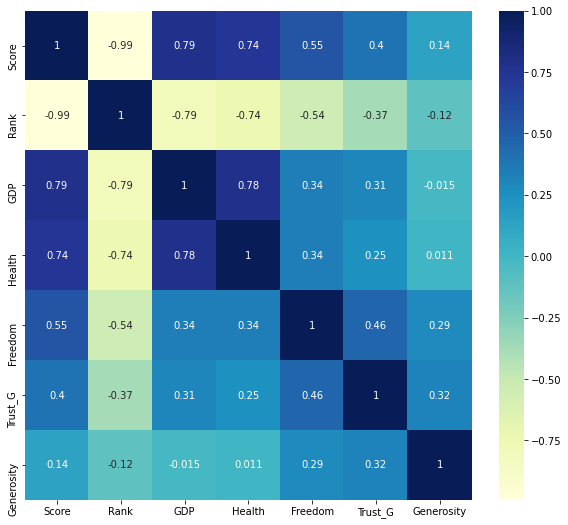

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(df_merged.corr(), cmap="YlGnBu", annot=True);

In [ ]:
happiest = df_merged.groupby('Country')['Score'].mean().sort_values(ascending=False)[:10].reset_index()
happiest.columns = ['Country','Score']
happiest

,Country,Score
0,Denmark,7.5460
1,Norway,7.5410
2,Finland,7.5378
3,Switzerland,7.5114
4,Iceland,7.5110
5,Netherlands,7.4046
6,Canada,7.3506
7,Sweden,7.3192
8,New Zealand,7.3130
9,Australia,7.2762


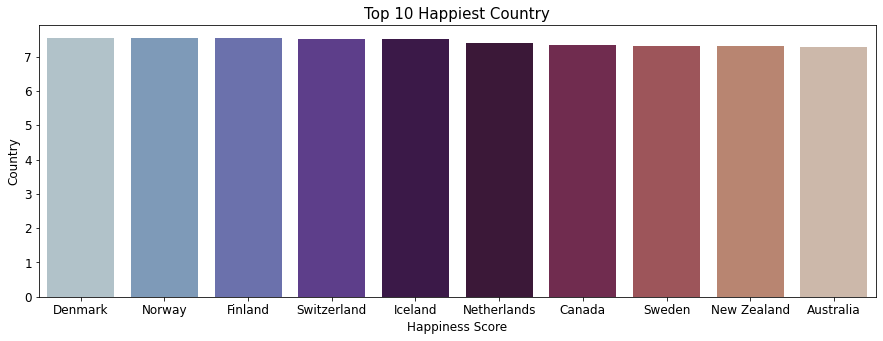

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(y=happiest['Score'], x=happiest['Country'], palette='twilight', orient='v')
# sns.barplot(x="Country", , )
plt.title('Top 10 Happiest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
# plt.xlim(0, 4)

In [ ]:
saddest = df_merged.groupby('Country')['Score'].mean().sort_values(ascending=True)[:10].reset_index()
saddest.columns = ['Country','Score']
saddest

,Country,Score
0,Burundi,3.07900
1,Central African Republic,3.13425
2,Syria,3.29220
3,South Sudan,3.38250
4,Rwanda,3.43860
5,Tanzania,3.46600
6,Afghanistan,3.51280
7,Togo,3.54420
8,Yemen,3.62580
9,Madagascar,3.74540


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text major ticklabel objects>)

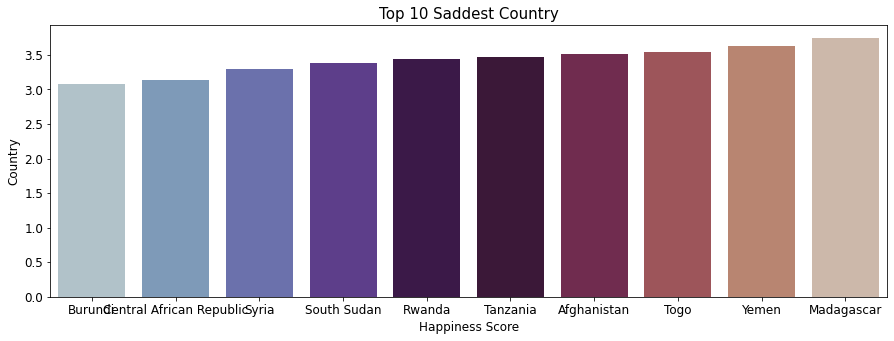

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(y=saddest['Score'], x=saddest['Country'], palette='twilight', orient='v')
# sns.barplot(x="Country", , )
plt.title('Top 10 Saddest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text major ticklabel objects>)

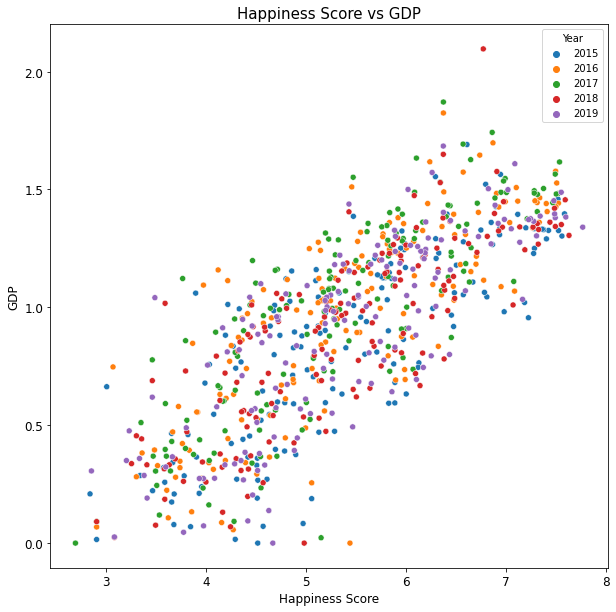

In [ ]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=df_merged, x="Score", y="GDP", hue="Year")
plt.title('Happiness Score vs GDP', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

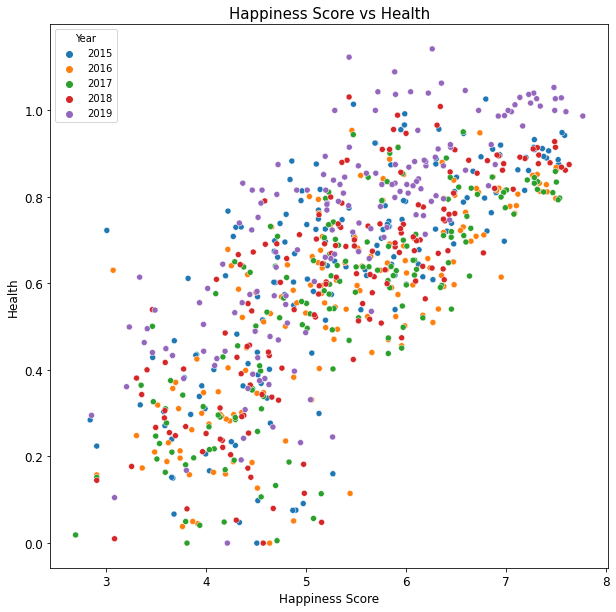

In [ ]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=df_merged, x="Score", y="Health", hue="Year")
plt.title('Happiness Score vs Health', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Health', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [ ]:
asean_country = df_merged.loc[(df_merged['Country'] == 'Indonesia') | (df_merged['Country'] == 'Vietnam') | (df_merged['Country'] == 'Malaysia') \
                              | (df_merged['Country'] == 'Filipina') | (df_merged['Country'] == 'Singapura') | (df_merged['Country'] == 'Thailand') \
                              | (df_merged['Country'] == 'Brunnei Darussalam') | (df_merged['Country'] == 'Laos') | (df_merged['Country'] == 'Myanmar') \
                              | (df_merged['Country'] == 'Kamboja')]
asean_country.head()

,Country,Year,Score,Rank,GDP,Health,Freedom,Trust_G,Generosity
33,Thailand,2015,6.455,34,0.96690,0.73850,0.55664,0.03187,0.57630
60,Malaysia,2015,5.770,61,1.12486,0.72394,0.53024,0.10501,0.33075
73,Indonesia,2015,5.399,74,0.82827,0.63793,0.46611,0.00000,0.51535
74,Vietnam,2015,5.360,75,0.63216,0.74676,0.59444,0.10441,0.16860
98,Laos,2015,4.876,99,0.59066,0.54909,0.59591,0.24249,0.42192


(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text major ticklabel objects>)

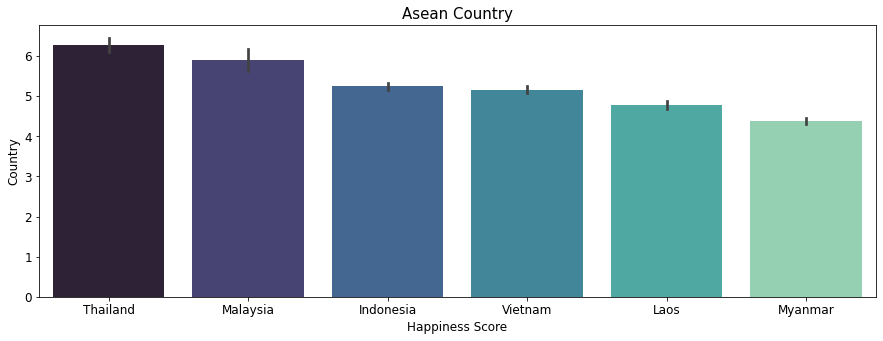

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(y=asean_country['Score'], x=asean_country['Country'], palette='mako', orient='v')
plt.title('Asean Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

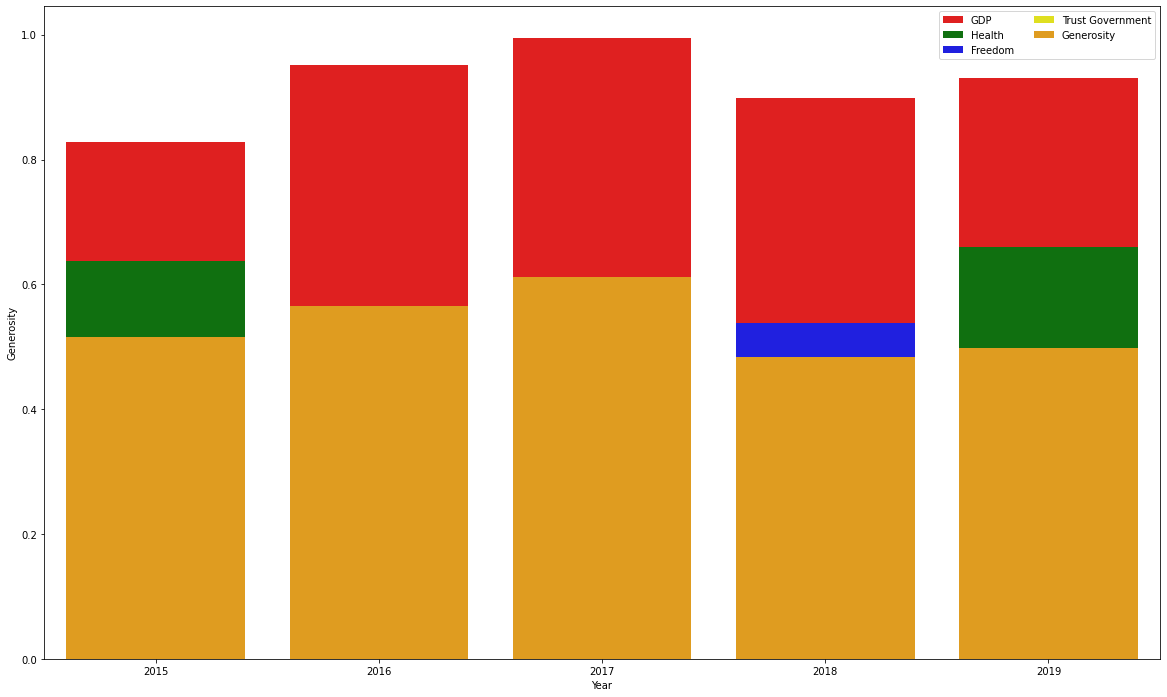

In [ ]:
indo_country = asean_country[asean_country['Country'] == 'Indonesia']

plotdata = indo_country[['Year', 'GDP', 'Health', 'Freedom', 'Trust_G', 'Generosity']]
# plotdata.index = plotdata['Year']

plt.figure(figsize=(20,12))

bar_plot1 = sns.barplot(x='Year', y='GDP', data=indo_country, label="GDP", color="red")
bar_plot2 = sns.barplot(x='Year', y='Health', data=indo_country, label="Health", color="green")
bar_plot3 = sns.barplot(x='Year', y='Freedom', data=indo_country, label="Freedom", color="blue")
bar_plot4 = sns.barplot(x='Year', y='Trust_G', data=indo_country, label="Trust Government", color="yellow")
bar_plot5 = sns.barplot(x='Year', y='Generosity', data=indo_country, label="Generosity", color="orange")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

# plotdata.plot(kind='bar', stacked=True)
# plt.xlabel("Year")
# plt.ylabel("Values");

In [ ]:
df_merged.head()

,Country,Year,Score,Rank,GDP,Health,Freedom,Trust_G,Generosity
0,Switzerland,2015,7.587,1,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015,7.561,2,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,2015,7.527,3,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,2015,7.522,4,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,2015,7.427,5,1.32629,0.90563,0.63297,0.32957,0.45811


In [ ]:
from google.colab import files

df_merged.to_excel('df_merged.xlsx')
files.download('df_merged.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>